In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
import requests

# Import the API key.
from config import weather_api_key

In [7]:
 #Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | halifax
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | chumikan
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | yumen
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | sevsk
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | roebourne
Processing Record 15 of Set 1 | alyangula
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | teshie
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | xai-xai
Processing Record 21 of Set 1 | te anau
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | podosinovets
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | dongfeng
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | balkanabat
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | tallahassee
Processing Record 2 of Set 5 | boksitogorsk
Processing Record 3 of Set 5 | trogir
Processing Record 4 of Set 5 | los andes
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 7 of Set 5 | santa cruz
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | cherskiy
Processing Record 10 of Set 5 | ksenyevka
City not found. Skipping...
Processing Record 11 of Set 5 | noumea
Processing 

Processing Record 28 of Set 8 | uruburetama
Processing Record 29 of Set 8 | mecca
Processing Record 30 of Set 8 | kansanshi
Processing Record 31 of Set 8 | bay roberts
Processing Record 32 of Set 8 | san carlos de bariloche
Processing Record 33 of Set 8 | fare
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | dzerzhinsk
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | labutta
City not found. Skipping...
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | surt
Processing Record 40 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 8 | mount darwin
Processing Record 42 of Set 8 | yerbogachen
Processing Record 43 of Set 8 | birjand
Processing Record 44 of Set 8 | okha
Processing Record 45 of Set 8 | royan
Processing Record 46 of Set 8 | tiarei
Processing Record 47 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 48 of Set 8 | nioro
Processing Record 49 of Set 8 | sumbawa
City not f

Processing Record 13 of Set 12 | sorland
Processing Record 14 of Set 12 | george
Processing Record 15 of Set 12 | lingen
Processing Record 16 of Set 12 | vila
Processing Record 17 of Set 12 | novikovo
Processing Record 18 of Set 12 | dingle
Processing Record 19 of Set 12 | lincoln
Processing Record 20 of Set 12 | belmonte
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | doha
Processing Record 23 of Set 12 | dudinka
Processing Record 24 of Set 12 | el tocuyo
Processing Record 25 of Set 12 | tromso
Processing Record 26 of Set 12 | port macquarie
Processing Record 27 of Set 12 | carballo
Processing Record 28 of Set 12 | puerto madryn
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | meridian
Processing Record 32 of Set 12 | toliary
City not found. Skipping...
Processing Record 33 of Set 12 | alghero
Processing Record 34 of Set 12 | manono
Processing Record 35 of Set 12 | marawi
Processing Recor

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,69.12,68,0,1.01,ZA,2022-02-06 00:14:46
1,Halifax,44.6453,-63.5724,19.09,85,81,7.00,CA,2022-02-06 00:13:07
2,Hilo,19.7297,-155.0900,78.53,78,100,9.22,US,2022-02-06 00:15:35
3,Chumikan,54.7183,135.3150,-1.10,78,100,12.95,RU,2022-02-06 00:16:59
4,Yumen,40.2833,97.2000,15.22,42,100,13.96,CN,2022-02-06 00:17:00
5,Kapaa,22.0752,-159.3190,80.19,65,0,1.99,US,2022-02-06 00:17:00
6,Pevek,69.7008,170.3133,-26.84,99,42,1.79,RU,2022-02-06 00:12:16
7,Port Alfred,-33.5906,26.8910,70.20,86,73,25.88,ZA,2022-02-06 00:17:01
8,Sevsk,52.1491,34.4926,30.81,97,100,11.41,RU,2022-02-06 00:17:01
9,Aklavik,68.2191,-135.0107,-35.90,89,10,0.56,CA,2022-02-06 00:14:17


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-02-06 00:14:46,-33.9258,18.4232,69.12,68,0,1.01
1,Halifax,CA,2022-02-06 00:13:07,44.6453,-63.5724,19.09,85,81,7.00
2,Hilo,US,2022-02-06 00:15:35,19.7297,-155.0900,78.53,78,100,9.22
3,Chumikan,RU,2022-02-06 00:16:59,54.7183,135.3150,-1.10,78,100,12.95
4,Yumen,CN,2022-02-06 00:17:00,40.2833,97.2000,15.22,42,100,13.96
5,Kapaa,US,2022-02-06 00:17:00,22.0752,-159.3190,80.19,65,0,1.99
6,Pevek,RU,2022-02-06 00:12:16,69.7008,170.3133,-26.84,99,42,1.79
7,Port Alfred,ZA,2022-02-06 00:17:01,-33.5906,26.8910,70.20,86,73,25.88
8,Sevsk,RU,2022-02-06 00:17:01,52.1491,34.4926,30.81,97,100,11.41
9,Aklavik,CA,2022-02-06 00:14:17,68.2191,-135.0107,-35.90,89,10,0.56


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

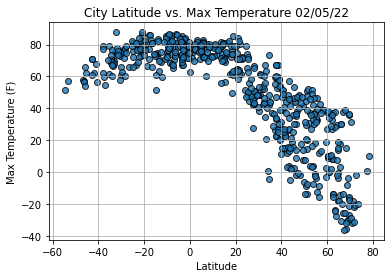

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

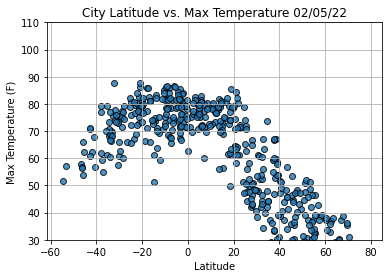

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(30, 110)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

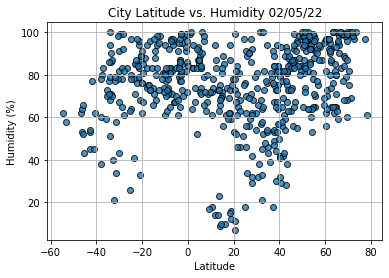

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

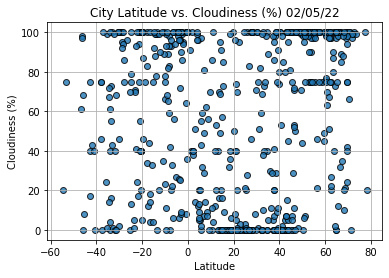

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

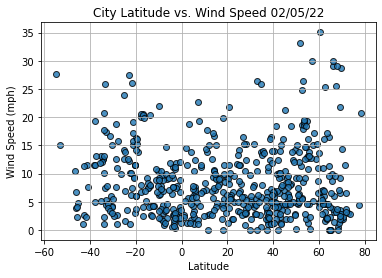

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Sao Filipe
Country                        CV
Date          2022-02-06 00:17:03
Lat                       14.8961
Lng                      -24.4956
Max Temp                    73.09
Humidity                       72
Cloudiness                      0
Wind Speed                   9.24
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
560     True
561    False
562    False
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Halifax,CA,2022-02-06 00:13:07,44.6453,-63.5724,19.09,85,81,7.00
2,Hilo,US,2022-02-06 00:15:35,19.7297,-155.0900,78.53,78,100,9.22
3,Chumikan,RU,2022-02-06 00:16:59,54.7183,135.3150,-1.10,78,100,12.95
4,Yumen,CN,2022-02-06 00:17:00,40.2833,97.2000,15.22,42,100,13.96
5,Kapaa,US,2022-02-06 00:17:00,22.0752,-159.3190,80.19,65,0,1.99


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

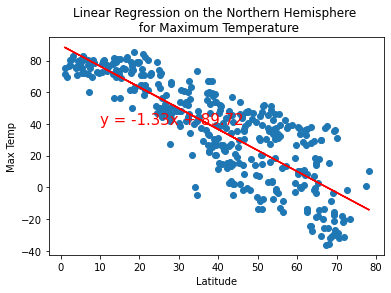

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

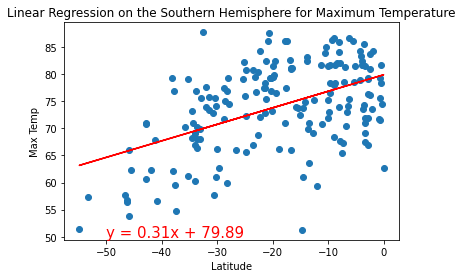

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,50))

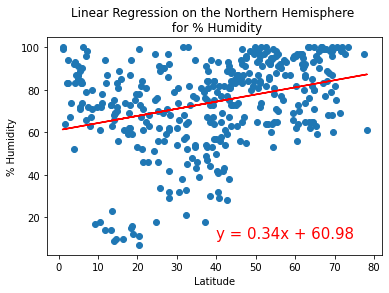

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

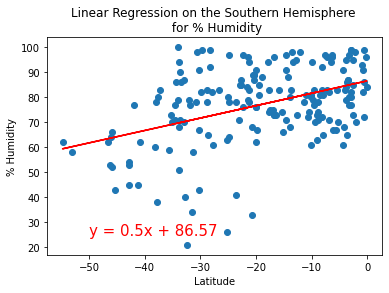

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

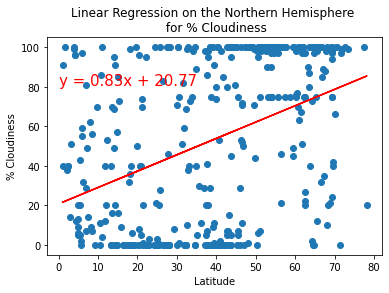

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,81))

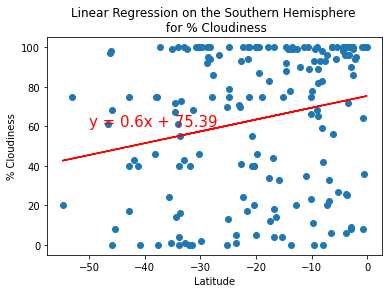

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

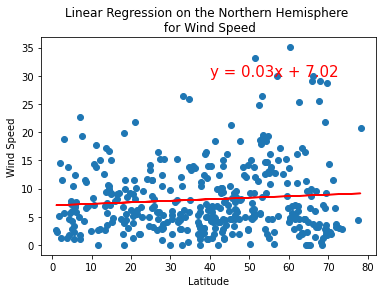

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

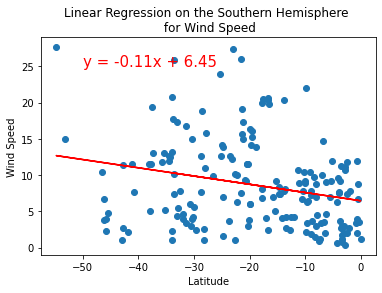

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))